Airline passenger forecast next 10 months

In [1]:
 import numpy as np
 import pandas as pd
 from scipy import stats
 import statsmodels.api as sm
 import matplotlib.pyplot as plt
 import seaborn as sns

C:\Users\Shanmukh.Maddila\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [5]:
!python -m pip install --upgrade pip

  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.


In [8]:
!pip install prophet

  Using cached numpy-1.21.6-cp37-cp37m-win_amd64.whl.metadata (2.2 kB)
  Using cached pandas-1.1.5-cp37-cp37m-win_amd64.whl.metadata (4.7 kB)
  Using cached holidays-0.27.1-py3-none-any.whl.metadata (15 kB)
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 13.3/13.3 MB 9.5 MB/s eta 0:00:00
   ---------------------------------------- 83.2/83.2 kB 2.4 MB/s eta 0:00:00
Using cached holidays-0.27.1-py3-none-any.whl (598 kB)
Using cached numpy-1.21.6-cp37-cp37m-win_amd64.whl (14.0 MB)
Using cached pandas-1.1.5-cp37-cp37m-win_amd64.whl (8.7 MB)
Using cached tqdm-4.66.4-py3-none-any.whl (78 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.26.0
    Uninstalling tqdm-4.26.0:
      Successfully uninstalled tqdm-4.26.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.15.1
    Uninstalling numpy-1.15.1:
      Successfully uninstalled numpy-1.15.1
  Attempting uninstall: pandas
    Found existing in

In [2]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [3]:
from pandas.io.common import is_url

In [4]:
df = pd.read_csv("C:/Users/Shanmukh.Maddila/Downloads/AirPassengers.csv")

In [5]:
df.head(2)

,Month,#Passengers
0,1949-01,112
1,1949-02,118


In [7]:
x = df["Month"]

In [8]:
y= df["#Passengers"]

C:\Users\Shanmukh.Maddila\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Shanmukh.Maddila\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Shanmukh.Maddila\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5,1,'Passenger trend')

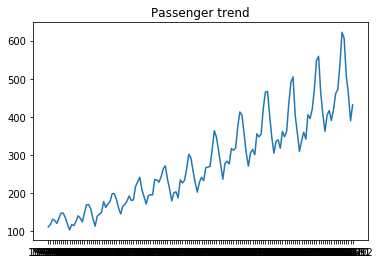

In [11]:
plt.plot(x,y)
plt.title("Passenger trend")

In [12]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [13]:
df['Date'] = pd.to_datetime(df['Month'])

In [14]:
df.head(5)

,Month,#Passengers,Date
0,1949-01,112,1949-01-01
1,1949-02,118,1949-02-01
2,1949-03,132,1949-03-01
3,1949-04,129,1949-04-01
4,1949-05,121,1949-05-01


In [21]:
df = df.drop(columns="Month")

In [22]:
df['Date'].min()

Timestamp('1949-01-01 00:00:00')

In [23]:
df['Date'].max()

Timestamp('1960-12-01 00:00:00')

In [24]:
df.head(1)

,#Passengers,Date
0,112,1949-01-01


In [26]:
df = df[["Date","#Passengers"]]

In [27]:
df.head(1)

,Date,#Passengers
0,1949-01-01,112


In [29]:
df.columns = ["ds","y"]

In [30]:
df.head(1)

,ds,y
0,1949-01-01,112


In [32]:
m = Prophet(weekly_seasonality= True,daily_seasonality = True)

In [33]:
m.fit(df)

22:52:41 - cmdstanpy - INFO - Chain [1] start processing
22:52:46 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
future = m.make_future_dataframe(periods = 10,freq = 'm')

In [37]:
future

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
149,1961-05-31
150,1961-06-30
151,1961-07-31
152,1961-08-31


In [38]:
forecast = m.predict(future)

C:\Users\Shanmukh.Maddila\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Shanmukh.Maddila\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


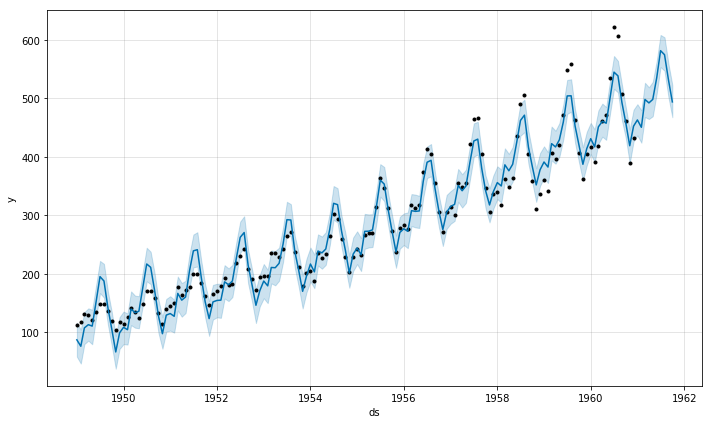

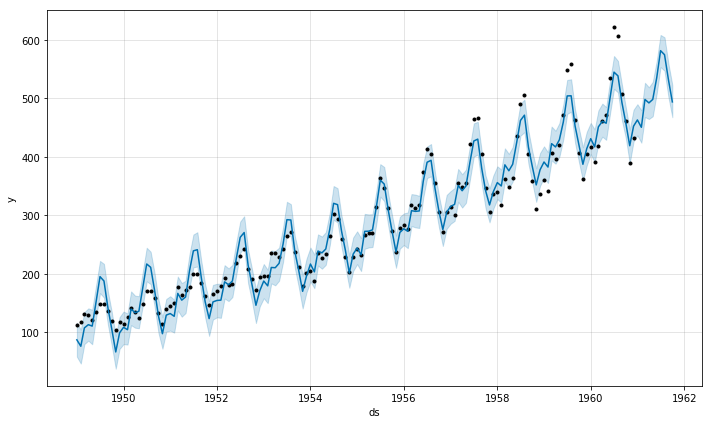

In [39]:
m.plot(forecast)

In [40]:
from sklearn.metrics import r2_score

In [41]:
actual = df[["y"]]

In [50]:
forecast_sample = forecast[0:144]

In [51]:
forecast_sample

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,110.937432,58.402062,116.170527,110.937432,110.937432,-23.806126,-23.806126,-23.806126,-3.703836,...,1.127504,1.127504,1.127504,-21.229794,-21.229794,-21.229794,0.0,0.0,0.0,87.131306
1,1949-02-01,113.081123,46.521150,104.647005,113.081123,113.081123,-36.935874,-36.935874,-36.935874,-3.703836,...,-3.845934,-3.845934,-3.845934,-29.386104,-29.386104,-29.386104,0.0,0.0,0.0,76.145249
2,1949-03-01,115.017361,79.881712,134.406851,115.017361,115.017361,-7.463509,-7.463509,-7.463509,-3.703836,...,-3.845934,-3.845934,-3.845934,0.086261,0.086261,0.086261,0.0,0.0,0.0,107.553852
3,1949-04-01,117.161052,85.743574,141.008936,117.161052,117.161052,-4.111558,-4.111558,-4.111558,-3.703836,...,4.763748,4.763748,4.763748,-5.171470,-5.171470,-5.171470,0.0,0.0,0.0,113.049494
4,1949-05-01,119.235592,79.565902,138.538430,119.235592,119.235592,-8.644700,-8.644700,-8.644700,-3.703836,...,-1.590424,-1.590424,-1.590424,-3.350440,-3.350440,-3.350440,0.0,0.0,0.0,110.590892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1960-08-01,476.190895,510.206373,564.010290,476.190895,476.190895,62.256011,62.256011,62.256011,-3.703836,...,-2.161651,-2.161651,-2.161651,68.121497,68.121497,68.121497,0.0,0.0,0.0,538.446906
140,1960-09-01,479.324671,462.261085,523.415786,479.324671,479.324671,13.520997,13.520997,13.520997,-3.703836,...,0.588943,0.588943,0.588943,16.635890,16.635890,16.635890,0.0,0.0,0.0,492.845668
141,1960-10-01,482.357358,432.574364,485.121962,482.357358,482.357358,-23.941448,-23.941448,-23.941448,-3.703836,...,1.127504,1.127504,1.127504,-21.365116,-21.365116,-21.365116,0.0,0.0,0.0,458.415910
142,1960-11-01,485.491134,389.301176,446.464465,485.491134,485.491134,-66.539530,-66.539530,-66.539530,-3.703836,...,-3.845934,-3.845934,-3.845934,-58.989760,-58.989760,-58.989760,0.0,0.0,0.0,418.951604


In [52]:
prediction = forecast_sample[['yhat']]

In [53]:
r2_score(actual,prediction)

0.9652975601793586

In [55]:
print("Accuracy of the model is :",100*r2_score(actual,prediction))

Accuracy of the model is : 96.52975601793587
